In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [3]:
y,sr = librosa.load('Data/genres_original/reggae/reggae.00036.wav')

In [4]:
print('y:',y,'\n') 
print('y shape:',y.shape,'\n')
print('Length of y:',len(y),'\n')
print('Type: ',type(y),'\n')

y: [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

y shape: (661794,) 

Length of y: 661794 

Type:  <class 'numpy.ndarray'> 



In [5]:
print('Sample Rate (KHz) :',sr,'\n')
print('Length of Audio File: ',y.shape[0]/sr,'seconds','\n')

Sample Rate (KHz) : 22050 

Length of Audio File:  30.013333333333332 seconds 



In [6]:
audio_file,_ = librosa.effects.trim(y)

In [7]:
print('Audio File',audio_file,'\n')
print('Ret',_,'\n')
print('Shape of audio file: ',audio_file.shape,'\n')

Audio File [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

Ret [     0 661794] 

Shape of audio file:  (661794,) 



Text(0.5, 1.0, 'Sound Waves in Reggae 36')

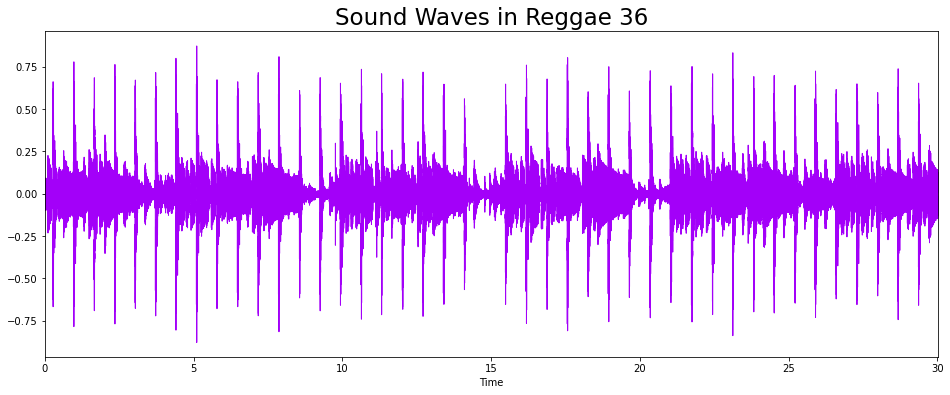

In [8]:
plt.figure(figsize=(16,6))
librosa.display.waveplot(y=audio_file,sr=sr,color = "#A300F9")
plt.title('Sound Waves in Reggae 36',fontsize=23)

In [9]:
n_fft = 2048
hop_length = 512

D = np.abs(librosa.stft(y=audio_file,n_fft=n_fft,hop_length=hop_length)) 

In [10]:
print('D: ',D,'\n')
print('Shape of D: ',D.shape,'\n')
print('Length of D:',len(D),'\n')
print('Type: ',type(D),'\n')

D:  [[6.74255848e-01 3.33992273e-01 5.23666218e-02 ... 1.11128904e-01
  8.50175858e-01 6.51748371e+00]
 [6.31012261e-01 3.35162640e-01 9.75335613e-02 ... 1.23138517e-01
  8.96887720e-01 6.86445236e+00]
 [4.80873227e-01 3.10819119e-01 1.91733122e-01 ... 4.46834683e-01
  1.22523260e+00 6.98825645e+00]
 ...
 [1.84022915e-02 9.40254144e-03 4.01545607e-04 ... 2.97801598e-05
  1.94990390e-03 1.35544697e-02]
 [1.85580198e-02 9.30057932e-03 2.28732955e-04 ... 5.36599691e-05
  1.82967074e-03 1.33122467e-02]
 [1.83994696e-02 9.11034737e-03 6.17524393e-06 ... 9.97001189e-06
  1.67538458e-03 1.31017622e-02]] 

Shape of D:  (1025, 1293) 

Length of D: 1025 

Type:  <class 'numpy.ndarray'> 



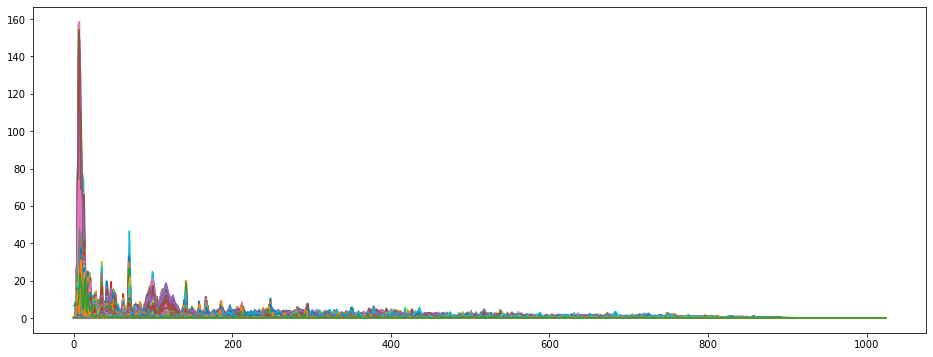

In [11]:
plt.figure(figsize = (16, 6))
plt.plot(D);
#To suppress the output, we append a semi-colon to the end of the last statement:

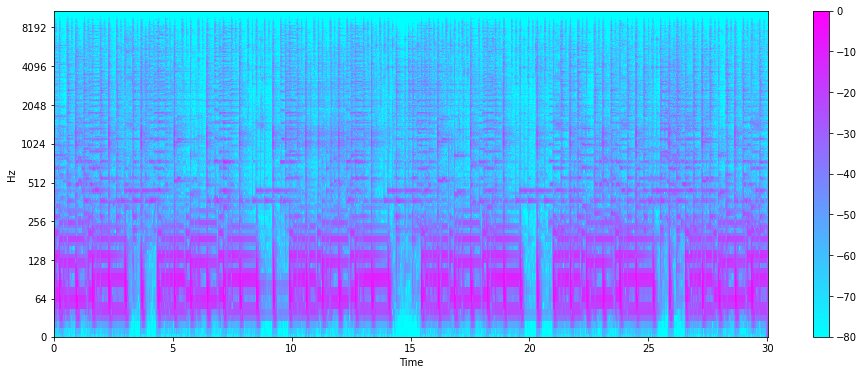

In [12]:
DB = librosa.amplitude_to_db(D,ref=np.max)

plt.figure(figsize=(16,6))
librosa.display.specshow(DB,x_axis='time',y_axis='log',cmap='cool',sr=sr,hop_length=hop_length)
plt.colorbar()

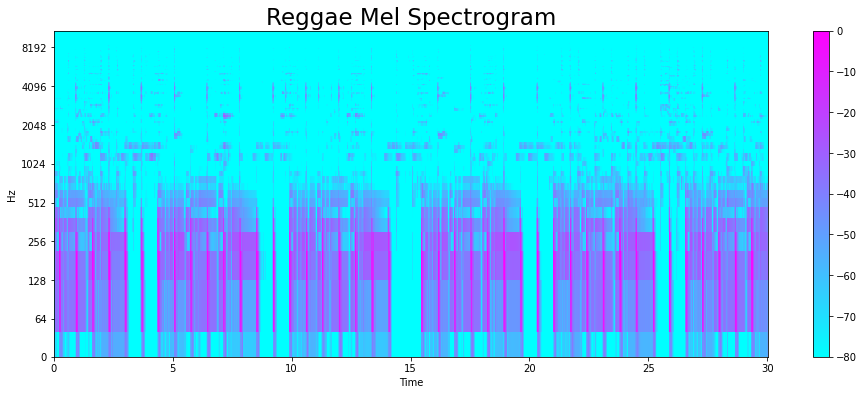

In [13]:
S = librosa.feature.melspectrogram(audio_file, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Reggae Mel Spectrogram", fontsize = 23);

In [14]:
y_metal,sr_metal = librosa.load('Data/genres_original/metal/metal.00036.wav')
y_metal,ret_metal = librosa.effects.trim(y_metal)

In [15]:
ret_metal

array([     0, 661504])

Text(0.5, 1.0, 'Metal Mel Spectrogram')

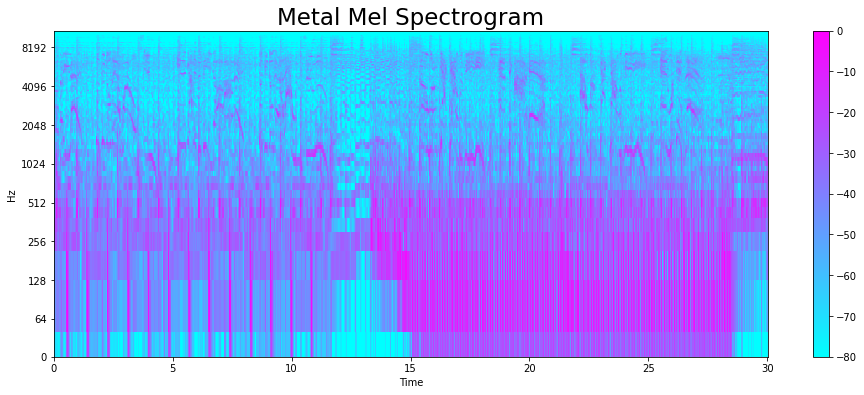

In [18]:
S_metal = librosa.feature.melspectrogram(y=y_metal,sr=sr_metal)
S_metalDB = librosa.amplitude_to_db(S_metal,ref = np.max)
plt.figure(figsize=(16,6))
librosa.display.specshow(S_metalDB,hop_length=hop_length,sr=sr_metal,cmap='cool',x_axis='time',y_axis='log')
plt.colorbar()
plt.title('Metal Mel Spectrogram',fontsize=23)

In [23]:
zero_crossings = librosa.zero_crossings(audio_file,pad=False)
zero_crossings_metal = librosa.zero_crossings(y_metal,pad=False)
print('Reggae Zero Crossings',sum(zero_crossings),'\n')
print('Metal Zero Crossings',sum(zero_crossings_metal),'\n')
print('Type :',type(zero_crossings))

Reggae Zero Crossings 39232 

Metal Zero Crossings 106295 

Type : <class 'numpy.ndarray'>


In [25]:
print(zero_crossings)
print(zero_crossings_metal)

[False False False ... False False False]
[False False False ... False False False]


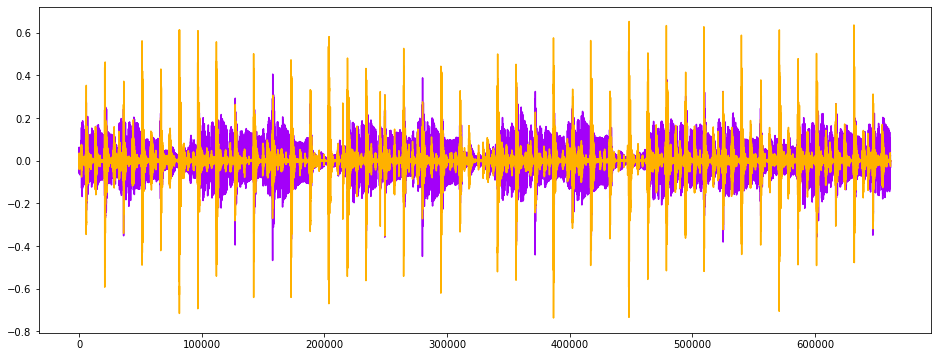

In [26]:
y_harm,y_per = librosa.effects.hpss(audio_file)
plt.figure(figsize=(16,6))
plt.plot(y_harm,color='#A300F9')
plt.plot(y_per,color='#FFB100')

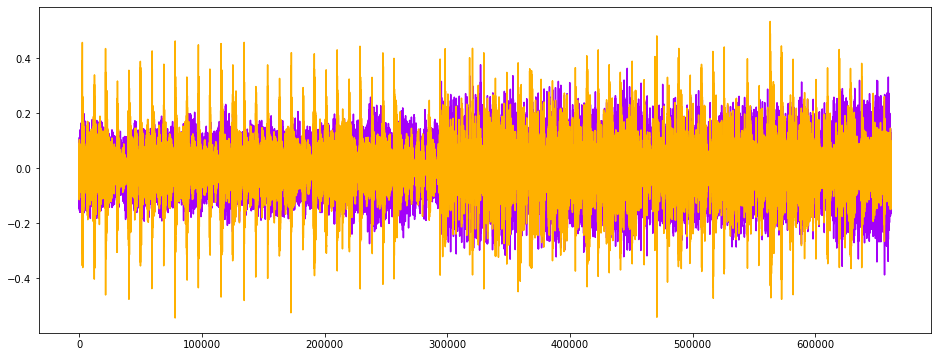

In [28]:
y_harm_metal,y_per_metal = librosa.effects.hpss(y_metal)
plt.figure(figsize=(16,6))
plt.plot(y_harm_metal,color='#A300F9')
plt.plot(y_per_metal,color='#FFB100')

In [31]:
tempo,ret_beat_reggae = librosa.beat.beat_track(audio_file,sr=sr)
print(tempo)

86.1328125


In [32]:
tempo_metal,ret_beat_metal = librosa.beat.beat_track(y_metal,sr=sr_metal)
print(tempo_metal)

143.5546875


In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [36]:
dataset = pd.read_csv('Data/features_3_sec.csv')
dataset.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [37]:
dataset_filtered = dataset.iloc[:,1:]
dataset_filtered.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [80]:
y = dataset_filtered['label'].values
X = dataset_filtered.drop('label',axis=1).values

In [48]:
print(y)
print(X)

['blues' 'blues' 'blues' ... 'rock' 'rock' 'rock']
[[ 6.61490000e+04  3.35406363e-01  9.10482928e-02 ...  3.36180725e+01
  -2.43026793e-01  4.37717667e+01]
 [ 6.61490000e+04  3.43065351e-01  8.61465260e-02 ...  9.70308304e+01
   5.78406334e+00  5.99430809e+01]
 [ 6.61490000e+04  3.46814752e-01  9.22428891e-02 ...  5.30508347e+01
   2.51737475e+00  3.31051216e+01]
 ...
 [ 6.61490000e+04  3.47480893e-01  8.90194401e-02 ...  4.85823784e+01
  -2.99545288e-01  4.15869904e+01]
 [ 6.61490000e+04  3.87527317e-01  8.48154277e-02 ...  2.48436127e+01
   6.75824106e-01  1.27877502e+01]
 [ 6.61490000e+04  3.69292945e-01  8.67586955e-02 ...  3.94859009e+01
  -3.41253424e+00  3.17274895e+01]]


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [82]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
def model_assess(model, title = "Default"):
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    #print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

In [53]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

Accuracy Naive Bayes : 0.52186 

Accuracy Stochastic Gradient Descent : 0.63964 

Accuracy KNN : 0.80914 

Accuracy Decission trees : 0.65599 

Accuracy Random Forest : 0.81448 

Accuracy Support Vector Machine : 0.75742 

Accuracy Logistic Regression : 0.68669 



In [55]:
import tensorflow as tf

In [57]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [56]:
ann = tf.keras.models.Sequential()

In [58]:
ann.add(tf.keras.layers.Dense(units=1024, activation='relu'))
ann.add(Dropout(0.2))

ann.add(tf.keras.layers.Dense(units=512, activation='relu'))
ann.add(Dropout(0.2))

ann.add(tf.keras.layers.Dense(units=256, activation='relu'))
ann.add(Dropout(0.2))

ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
ann.add(Dropout(0.2))

ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(Dropout(0.2))

ann.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [70]:
ann.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [71]:
X_train_scaled

array([[0.        , 0.29099938, 0.66709019, ..., 0.10145208, 0.5227115 ,
        0.14557432],
       [0.        , 0.38141124, 0.65799006, ..., 0.09083669, 0.51650782,
        0.16883173],
       [0.        , 0.37587227, 0.69050578, ..., 0.02704673, 0.47613483,
        0.0513055 ],
       ...,
       [0.        , 0.3299673 , 0.70223712, ..., 0.04680841, 0.43833422,
        0.0327323 ],
       [0.        , 0.12586055, 0.62679389, ..., 0.1747508 , 0.59145205,
        0.17589495],
       [0.        , 0.45588755, 0.62666239, ..., 0.02296708, 0.54653023,
        0.02941717]])

In [72]:
y_train

array([3, 8, 4, ..., 8, 1, 1])

In [65]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [84]:
y = labelencoder.fit_transform(y)
print(y)

[0 0 0 ... 9 9 9]


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [89]:
ann.fit(X_train_scaled, y_train, batch_size = 32,validation_data=(X_test_scaled,y_test),epochs = 10)

Epoch 1/10
219/219 [==============================] - 5s 21ms/step - loss: 0.1434 - accuracy: 0.9524 - val_loss: 0.4024 - val_accuracy: 0.9072
Epoch 2/10
219/219 [==============================] - 3s 14ms/step - loss: 0.1294 - accuracy: 0.9598 - val_loss: 0.4068 - val_accuracy: 0.9029
Epoch 3/10
219/219 [==============================] - 3s 14ms/step - loss: 0.1427 - accuracy: 0.9548 - val_loss: 0.3804 - val_accuracy: 0.9099
Epoch 4/10
219/219 [==============================] - 3s 14ms/step - loss: 0.1148 - accuracy: 0.9635 - val_loss: 0.4317 - val_accuracy: 0.9006
Epoch 5/10
219/219 [==============================] - 3s 14ms/step - loss: 0.1316 - accuracy: 0.9571 - val_loss: 0.3933 - val_accuracy: 0.9059
Epoch 6/10
219/219 [==============================] - 3s 14ms/step - loss: 0.1460 - accuracy: 0.9527 - val_loss: 0.4639 - val_accuracy: 0.8872
Epoch 7/10
219/219 [==============================] - 3s 14ms/step - loss: 0.1363 - accuracy: 0.9578 - val_loss: 0.4251 - val_accuracy: 0.8982

In [78]:
loss, acc  = ann.evaluate(X_test_scaled, y_test, batch_size=32)
print('Loss = ',loss,'Accuracy = ',acc)

94/94 [==============================] - 0s 3ms/step - loss: 0.4199 - accuracy: 0.8896
Loss =  0.4198608100414276 Accuracy =  0.8895562291145325
